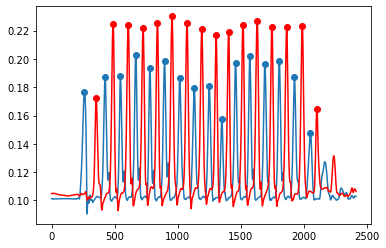

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

path = "/Users/wangshuaibo/Documents/北京悦动/脑卒中项目/阿帅笔记/测试数据及分析结果/20230418鞋垫预实验/XsensMVN/郑金增-002.xlsx"

# 从 Excel 文件中读取数据
df = pd.read_excel(path, sheet_name="Segment Position", engine="openpyxl")

# 使用 scipy.signal.find_peaks 函数找到左脚和右脚的峰值
Left_peaks, _ = find_peaks(df["Left Foot z"], height=0.14)
Right_peaks, _ = find_peaks(df["Right Foot z"], height=0.14)

# 获取左脚和右脚峰值对应的数值
Left_peaks_value = df["Left Foot z"].loc[Left_peaks]
Right_peaks_value = df["Right Foot z"].loc[Right_peaks]

# 绘制左脚和右脚的 z 轴数据，并在峰值处添加散点图
df["Left Foot z"].plot()
plt.scatter(Left_peaks, Left_peaks_value)
df["Right Foot z"].plot(color="red")
plt.scatter(Right_peaks, Right_peaks_value, color="red")


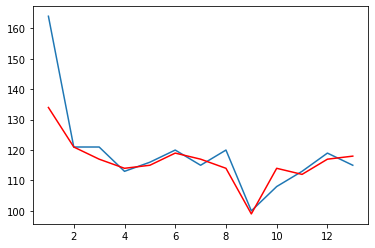

In [3]:
# 计算左脚和右脚峰值之间的差值，并绘制差值的折线图
Left_diff = np.diff(Left_peaks)[:-2]
Right_diff = np.diff(Right_peaks)[:-2]
x = np.linspace(1, 13, 13, endpoint=True)
plt.plot(x, Left_diff)
plt.plot(x, Right_diff, color="red")

In [23]:
print("患侧腿为左腿，健侧腿为右腿")
print(f"患侧平均步高：{Left_peaks_value.mean()*100:.1f} 厘米")
print(f"健侧平均步高：{Right_peaks_value.mean()*100:.1f} 厘米")

患侧腿为左腿，健侧腿为右腿
患侧平均步高：18.6 厘米
健侧平均步高：21.6 厘米
